In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def run_main():
    # cap = cv2.VideoCapture(0)
    # cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, 1280)
    # cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, 720)
    # while(True):
        # ret, frame = cap.read()
        # roi = frame[0:500, 0:500]
    img = cv2.imread('images/coins.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
    thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)
    cont_img = closing.copy()
    contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # counter = 0
    # for cnt in contours:
    #     area = cv2.contourArea(cnt)
    #     if area < 2000 or area > 4000:
    #         continue
    #     if len(cnt) < 5:
    #         counter += 1
    #         continue
    #     ellipse = cv2.fitEllipse(cnt)
    #     cv2.ellipse(img, ellipse, (0,255,0), 2)
    # cv2.imshow("Morphological Closing", closing)
    # cv2.imshow("Adaptive Thresholding", thresh)
    # cv2.imshow('Contours', img)
    print("Counter",len(contours))
    plt.figure(figsize=(32,24))
    plt.subplot(221),plt.imshow(img),plt.title('Original')
    plt.subplot(222),plt.imshow(closing),plt.title('Morphological Closing')
    plt.subplot(223),plt.imshow(thresh),plt.title('Adaptive Thresholding')
    plt.subplot(224),plt.imshow(img),plt.title('Contours')
    plt.show()
    #     if cv2.waitKey(1) & 0xFF == ord('q'):
    #         break
    # cap.release()
    # cv2.destroyAllWindows()

Counter 17


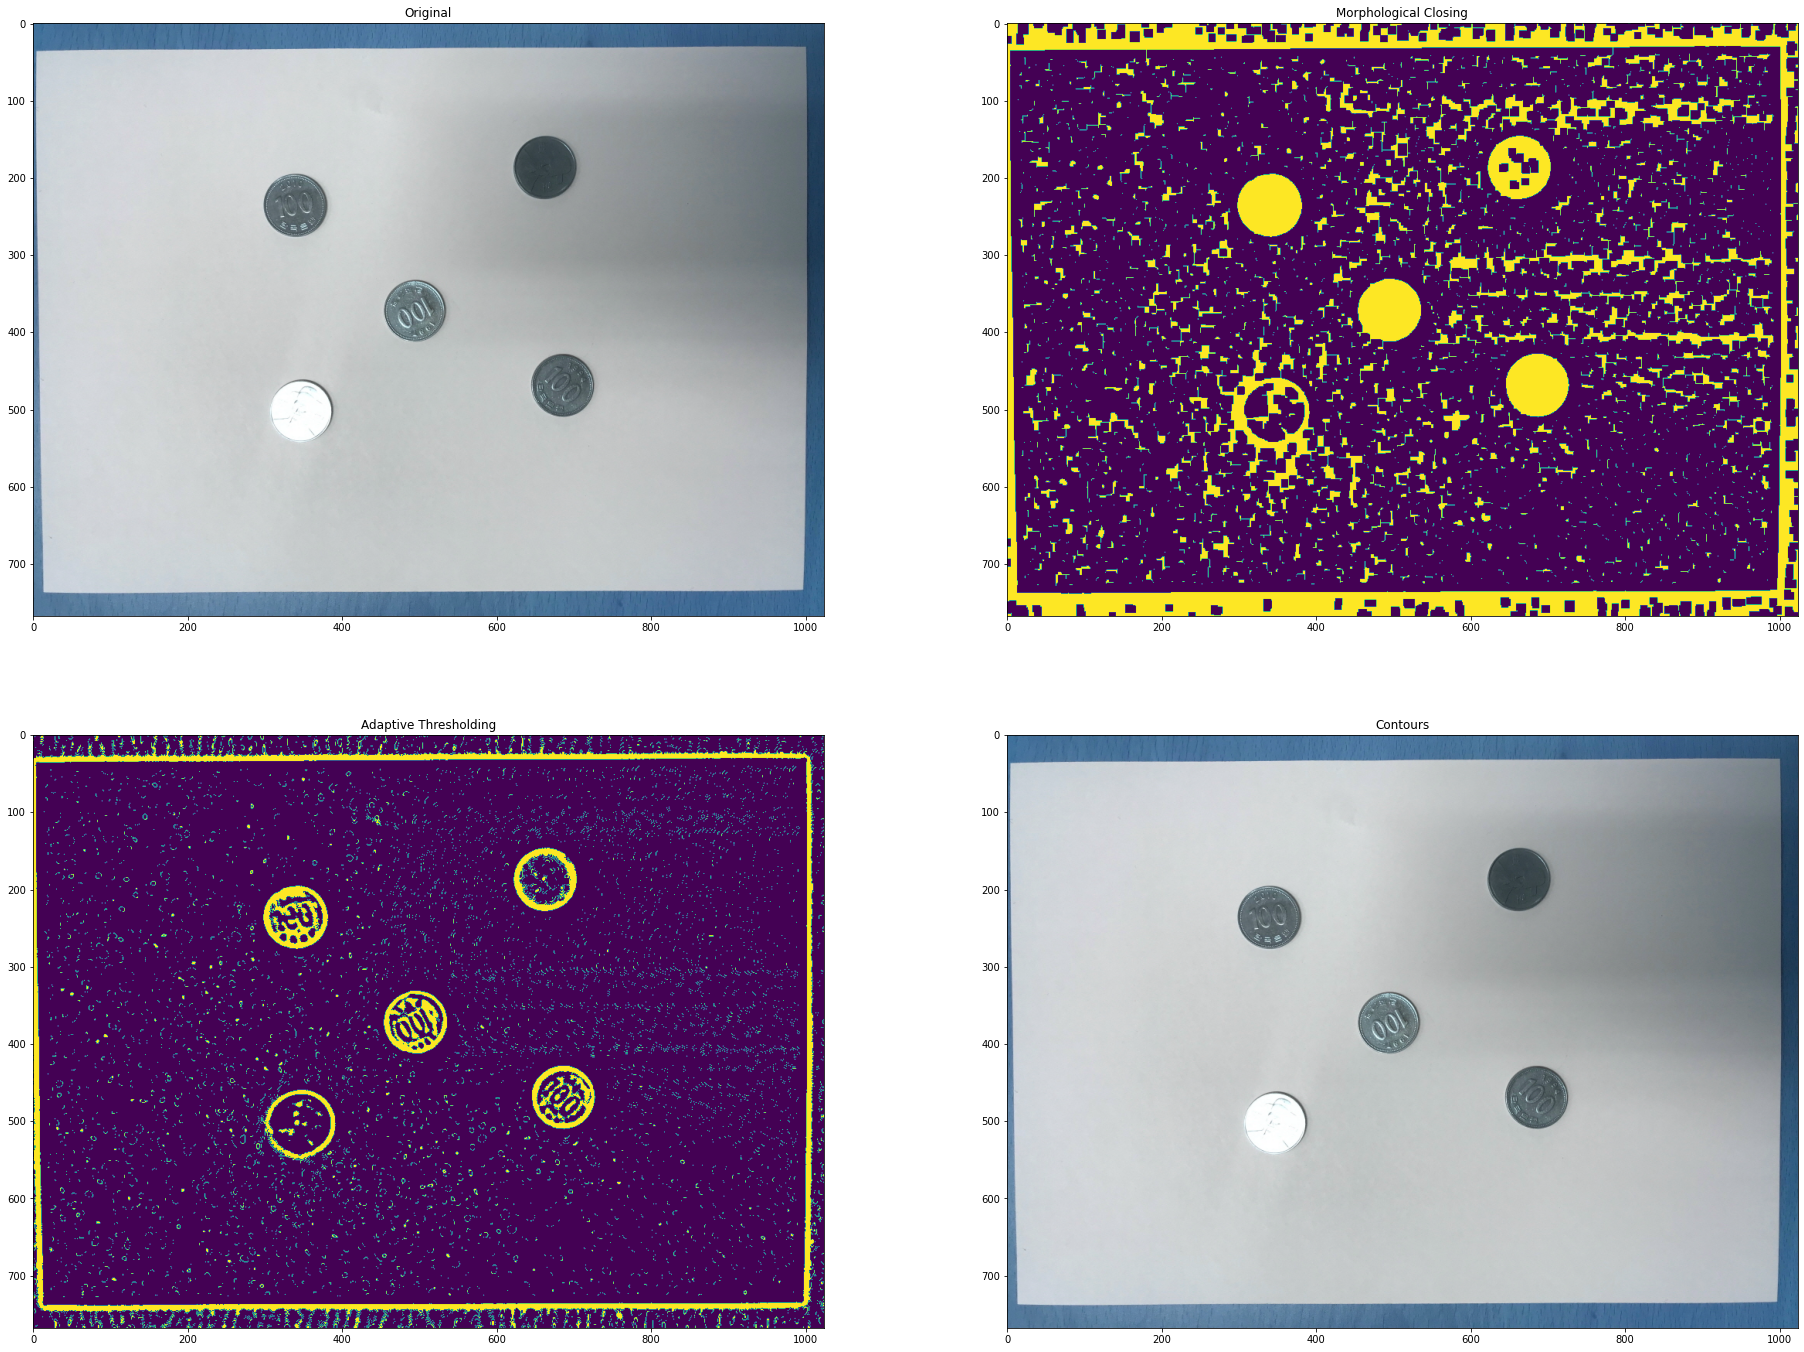

In [3]:
if __name__ == "__main__":
    run_main()

In [2]:

def show_images(canny, img_final):
    plt.figure(figsize=(15, 15))
    plt.subplot(121),plt.imshow(canny),plt.title('Canny edge', fontsize=25)
    plt.subplot(122),plt.imshow(img_final),plt.title('Final result', fontsize=25)

def count(img, gb_kernel=(15,15), lower=20, upper=200):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ga_blur = cv2.GaussianBlur(gray, gb_kernel, 0)
    
    canny = cv2.Canny(ga_blur, lower, upper)
    
    cont_img = canny.copy()
    contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    img_final = img.copy()
    
    for i in range(len(contours)):
        cv2.drawContours(img_final, contours[i], -1, (0,255,0), 3)
        # add text
        x,y,w,h = cv2.boundingRect(contours[i])
        cv2.putText(img_final, str(i+1),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1.1,(255,0,0),2)
   
    show_images(canny, img_final)
    
    print("There are" + str(len(contours)) + " of Coins in the picture = ")

There are1 of Coins in the picture = 


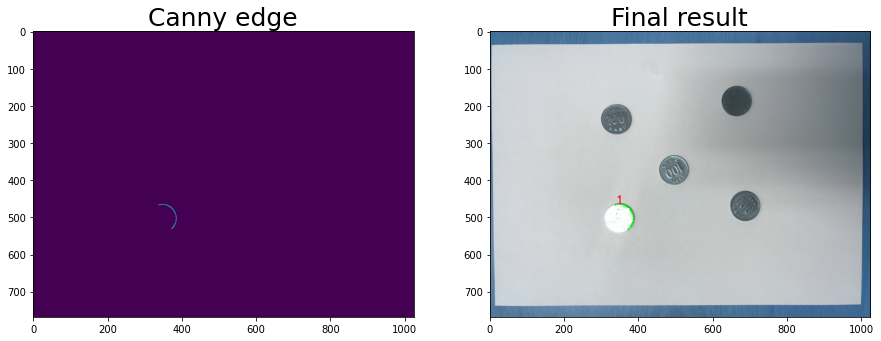

In [3]:
img = cv2.imread('./images/coins.jpg')

count(img)

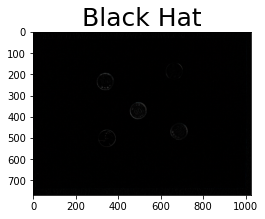

In [10]:
kernel=np.ones((3,3),np.uint8)
blackhat=cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(blackhat, 0))
plt.title('Black Hat', fontsize=25)
plt.show()

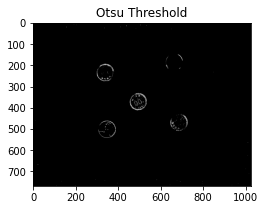

In [11]:

blackhat = cv2.cvtColor(blackhat, cv2.COLOR_RGB2GRAY)

ret,th=cv2.threshold(blackhat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(th, 0))
plt.title('Otsu Threshold')
plt.show()

In [12]:
cont_img = th.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

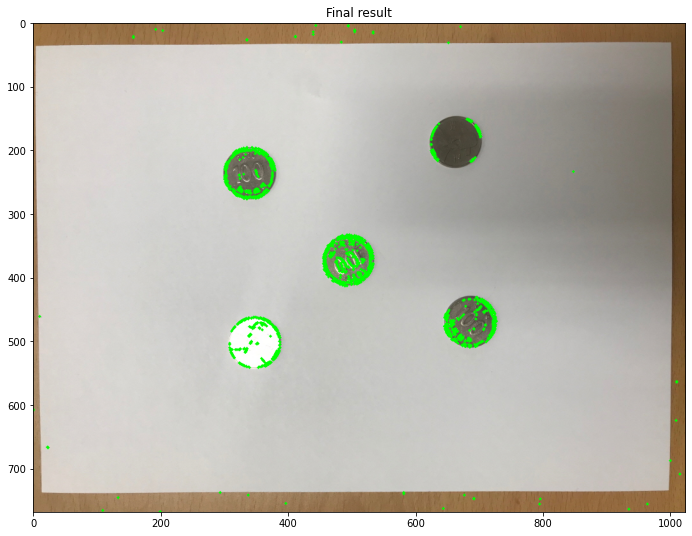

In [13]:
for i in range(len(contours)):
    cv2.drawContours(img, contours[i], -1, (0,255,0), 3)

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Results')
plt.show()